<h1><strong>Handwritten Digit Classification Using MNIST Dataset</strong></h1>

1) <strong>Load the MNIST Dataset</strong>

In [449]:
import tensorflow as tf

In [450]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2) <strong>Visualize the data</strong>

In [451]:
print(type(x_train))

print(x_train.shape)
print(x_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


In [452]:
import matplotlib.pyplot as plt

Label: 4


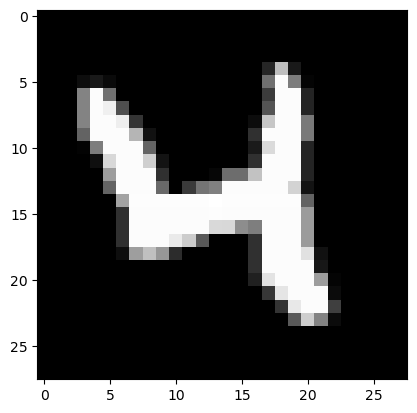

In [453]:
plt.imshow(x_train[20], cmap='gray')
print(f"Label: {y_train[20]}")

3) <strong>Split the training data into training and validation</strong>

In [454]:
from sklearn.model_selection import train_test_split

In [455]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [456]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


4) <strong>Flatten the last two dimensions</strong>

Original shape: (\_, 28, 28)   New shape: (\_, 28x28) = (_, 784)

In [457]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))

In [458]:
print(x_train.shape)
print(x_val.shape)

(48000, 784)
(12000, 784)


5) <strong>Feature Scaling</strong>

In [459]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x_train)
x_train_scaled = norm_l(x_train)
x_val_scaled = norm_l(x_val)

In [460]:
print(x_train_scaled[0])

tf.Tensor(
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.93960222e-03 -6.43413141e-03 -4.56442218e-03 -4.56441659e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.56443988e-03 -5.26563590e-03 -8.96097999e-03 -1.18385386e-02
 -1.57573391e-02 -2.01821811e-02 -2.57051662e-02 -2.91365981e-02
 -2.92633548e-02 -3.04310340e-02 -3.24568935e-02 -3.04464381e-02
 -3.24599370e-02 -3.01376153e-02 -2.42246334e-02 -1.96609553e-02
 -1.75863449e-02 -1.14440834e-02 -8.25610571e-03 -4.56441892e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.56442451e-03 -4.56443569e-03
 -9.31157451e-

6) <strong>Build multiple models</strong>

In [461]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_models():
    model1 = Sequential([
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ], name='model_1')
    
    model2 = Sequential([
        Dense(units=30, activation='relu'),
        Dense(units=10, activation='linear')
    ], name='model_2')

    model3 = Sequential([
        Dense(units=50, activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ], name='model_3')

    model4 = Sequential([
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=20, activation='relu'),
        Dense(units=10, activation='linear')
    ], name='model_4')

    return [model1, model2, model3, model4]

7) <strong>Choose a good model</strong>

In [462]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

# Initialize lists that will contain the train accuracy, validation accuracy, and history for each model
train_acc = []
val_acc = []
history = []

# Build the models
models = build_models()

for model in models:
    
    model.compile(
        loss=SparseCategoricalCrossentropy(from_logits=True),
        optimizer=Adam(0.003)
    )
    
    print(f"Training {model.name}")
    model_history = model.fit(x_train_scaled, y_train, epochs=25, verbose=0)
    history.append(model_history)
    print("Done!")

    # Training accuracy
    yhat = model.predict(x_train_scaled, verbose=0)
    yhat = np.argmax(yhat, axis=-1)
    model_train_acc = (np.sum(yhat == y_train) / len(y_train)) * 100
    train_acc.append(model_train_acc)

    # Validation accuracy
    yhat = model.predict(x_val_scaled, verbose=0)
    yhat = np.argmax(yhat, axis=-1)
    model_val_acc = (np.sum(yhat == y_val) / len(y_val)) * 100
    val_acc.append(model_val_acc)


# Print the result
for i in range(len(models)):
    print(f"Model {i+1}: Training Accuracy: {train_acc[i]:.3f}%, Validation Accuracy: {val_acc[i]:.3f}%")

Training model_1
Done!


Training model_2
Done!


Training model_3
Done!


Training model_4
Done!
Model 1: Training Accuracy: 98.838%, Validation Accuracy: 95.200%
Model 2: Training Accuracy: 98.754%, Validation Accuracy: 95.300%
Model 3: Training Accuracy: 99.398%, Validation Accuracy: 96.492%
Model 4: Training Accuracy: 98.558%, Validation Accuracy: 95.400%


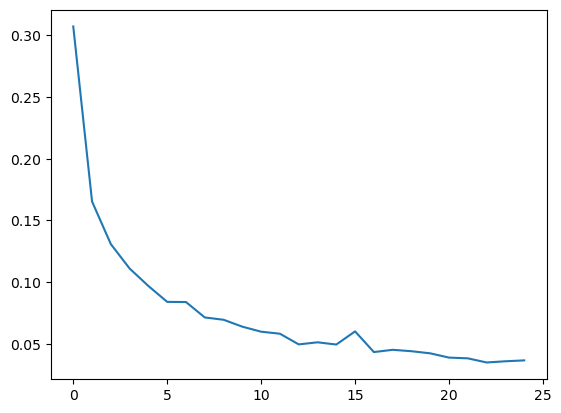

In [463]:
# Best model: model_3
model = models[2]
plt.plot(history[2].history['loss'])
plt.show()

8) <strong>Accuracy on test set</strong>

In [464]:
# Flatten the last two dimensions
x_test = x_test.reshape((x_test.shape[0], -1))

# Feature scaling
x_test_scaled = norm_l(x_test)

# Calculate accuracy
yhat = model.predict(x_test_scaled, verbose=0)
yhat = np.argmax(yhat, axis=-1)
test_acc = (np.sum(yhat == y_test) / len(y_test)) * 100
print(f"Test Accuracy: {test_acc: 3f}%")

Test Accuracy:  96.820000%


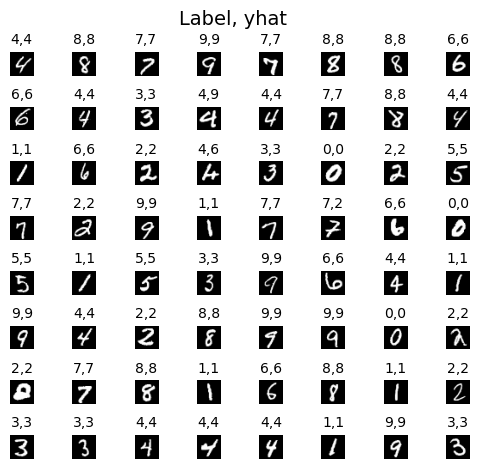

In [465]:
# Plot a random set of 64 images from the test set, along with their predicted label and true label

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    x_random_reshaped = x_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(x_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x_test[random_index].reshape(1,784), verbose=0)
    yhat = np.argmax(prediction)
    
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Label: 6
Model Prediction: 6


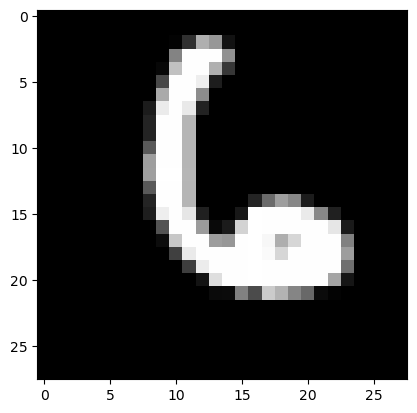

In [484]:
# For Demonstration

m = len(y_test)
random_index = np.random.randint(m)
x_random_reshaped = x_test[random_index].reshape((28, 28))

label = y_test[random_index]

prediction = model.predict(x_test[random_index].reshape((1, 784)), verbose=0)
yhat = np.argmax(prediction)

plt.imshow(x_random_reshaped, cmap="gray")
print(f"Label: {label}")
print(f"Model Prediction: {yhat}")